# Programming Assignment - Part 1

Basic DES simulator

## Answers to "Analysis and General Questions"

##### 1.6.1: Event-based Simulator
In the considered system, it is relatively easy to determine a state space and discrete events which transfer a system from one state to another. Moreover, jumping from event to event and not processing all the time instances  makes the simulation more efficient. Finally, it can be hard to find an appropriate time increment parameter for the Fixed-Increment Time Advance simulator.

Using event-based simulator is troublesome for complex continuos system, where it is hard to define events and how they affect the system dynamics. Using Fixed-Increment Time Advance is preferable for such systems, where the state can be defined by, e.g., equations, and sampled at discrete time instances with constant frequency.

Using Fixed-Increment Time Advance can be more efficient than Next-Event Time Advance if we are interested in how some parameter changes over large intervals of time. For instance, consider the case when we want to obtain how many packets are served per second, and arrival and service rates are high enough that there are always many events within one second. Here, it might be more efficient to use Fixed-Increment Time Advance with the increment of 1s. It might help to skip processing of some events which do not affect the result.

##### 1.6.2: Event Chain Structure
Using the heap, the oldest event is taken from the queue very fast ($O(1)$), whereas inserting events is also relatively fast ($O(\log n)$). The data structure is very efficient for our use case.

##### 1.6.3: Emergency Termination
The implementation is given below. If one of the events has an "Emergency" order, it is identified as smaller one, so it would be pulled first from the event list.

In [2]:
def __lt__(self, other):
    """
    Comparison is made by comparing timestamps. If time stamps are equal, orders are compared.
    """
    if self.order == "Emergency":
        return True
    if other.order == "Emergency":
        return False 
    if self.timestamp != other.timestamp:
        return self.timestamp < other.timestamp
    elif self.order != other.order:
        return self.order < other.order
    else:
        return True


## Simulation Study Results

In [3]:
import simstudy1

##### 1.7.1: Offered Traffic Determination I

Sim study for $\mu = 0.0015$. Start with high $\rho = 1.0$. First, decrease $\rho$ by $0.1$ after every 1000 runs. If level is (almost) reached after every 1000 runs, run again 3x 1000 times to ensure confidence. Then, increase $\rho$ by $0.09$ and start decreasing by $0.01$ after every 1000 runs to find the second decimal digit.

In [4]:
simstudy1.task_1_7_1()

RHO: 1.0 GOOD/TOTAL: 474/1000 PERCENT: 47.4%
RHO: 0.9 GOOD/TOTAL: 911/1000 PERCENT: 91.1%
RHO: 0.9 GOOD/TOTAL: 919/1000 PERCENT: 91.9%
RHO: 0.9 GOOD/TOTAL: 907/1000 PERCENT: 90.7%
RHO: 0.9 GOOD/TOTAL: 907/1000 PERCENT: 90.7%
RHO: 0.8 GOOD/TOTAL: 992/1000 PERCENT: 99.2%
RHO: 0.8 GOOD/TOTAL: 998/1000 PERCENT: 99.8%
RHO: 0.8 GOOD/TOTAL: 988/1000 PERCENT: 98.8%
RHO: 0.8 GOOD/TOTAL: 997/1000 PERCENT: 99.7%
RHO: 0.89 GOOD/TOTAL: 938/1000 PERCENT: 93.8%
RHO: 0.89 GOOD/TOTAL: 929/1000 PERCENT: 92.9%
RHO: 0.89 GOOD/TOTAL: 927/1000 PERCENT: 92.7%
RHO: 0.89 GOOD/TOTAL: 931/1000 PERCENT: 93.1%
RHO: 0.88 GOOD/TOTAL: 949/1000 PERCENT: 94.9%
RHO: 0.88 GOOD/TOTAL: 944/1000 PERCENT: 94.4%
RHO: 0.88 GOOD/TOTAL: 927/1000 PERCENT: 92.7%
RHO: 0.88 GOOD/TOTAL: 940/1000 PERCENT: 94.0%
RHO: 0.87 GOOD/TOTAL: 953/1000 PERCENT: 95.3%
RHO: 0.87 GOOD/TOTAL: 959/1000 PERCENT: 95.9%
RHO: 0.87 GOOD/TOTAL: 969/1000 PERCENT: 96.9%
RHO: 0.87 GOOD/TOTAL: 968/1000 PERCENT: 96.8%


0.87

Simulation study results in $\rho = 0.87$ in order to fulfill the requirements.

##### 1.7.2: Queue Length Determination II

Sim study for $\mu = 0.015$ and 50 blocked packets allowed.

In [5]:
simstudy1.task_1_7_2()

RHO: 1.0 GOOD/TOTAL: 398/1000 PERCENT: 39.8%
RHO: 0.9 GOOD/TOTAL: 1000/1000 PERCENT: 100.0%
RHO: 0.9 GOOD/TOTAL: 1000/1000 PERCENT: 100.0%
RHO: 0.9 GOOD/TOTAL: 1000/1000 PERCENT: 100.0%
RHO: 0.9 GOOD/TOTAL: 1000/1000 PERCENT: 100.0%
RHO: 0.99 GOOD/TOTAL: 586/1000 PERCENT: 58.6%
RHO: 0.98 GOOD/TOTAL: 750/1000 PERCENT: 75.0%
RHO: 0.97 GOOD/TOTAL: 881/1000 PERCENT: 88.1%
RHO: 0.96 GOOD/TOTAL: 945/1000 PERCENT: 94.5%
RHO: 0.96 GOOD/TOTAL: 949/1000 PERCENT: 94.9%
RHO: 0.96 GOOD/TOTAL: 946/1000 PERCENT: 94.6%
RHO: 0.96 GOOD/TOTAL: 956/1000 PERCENT: 95.6%
RHO: 0.95 GOOD/TOTAL: 979/1000 PERCENT: 97.9%
RHO: 0.95 GOOD/TOTAL: 977/1000 PERCENT: 97.7%
RHO: 0.95 GOOD/TOTAL: 975/1000 PERCENT: 97.5%
RHO: 0.95 GOOD/TOTAL: 984/1000 PERCENT: 98.4%


0.95

Simulation study results in $\rho = 0.95$ in order to fulfill the requirements, which is greater than for the previous task.

##### 1.7.3: Comparison of Results
Build CDF of the blocking probability per run for the same $\rho = 0.95$ and different $\mu$


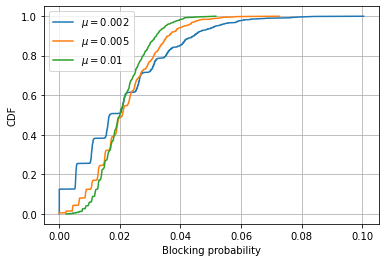

In [6]:
simstudy1.task_1_7_3()

One can see that the distribution is more spread (CDF is less stair-shaped, variance is higher) for lower $\mu$ with the same $\rho$. The reason for that is that queue is filled up faster with greater $\mu$ and more packets go through the system. If we record the blocking probability of each 100 packets entering the system and then average the sampled values, we will get the overall blocking ptobability for a simulation run. Thus, more packets in one simulation run means more samples for the blocking probability and decreased variance for the average as per the large numbers law. Thus, with lower $\mu$, there are more runs with the blocking probability higher than average, and the resulting $\rho$ is underestimated, as we had to decrease it more to eliminate cases with higher blocking probability. For larger $\mu$ and lower variance, higher $\rho$ can result in the same number of runs with the blocking probability under $95\%$. Thus, $\rho$ recorded for higher $\mu$ is higher.